Saving sentimentdataset.csv to sentimentdataset (1).csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Text       732 non-null    object 
 1   Sentiment  732 non-null    object 
 2   Platform   732 non-null    object 
 3   Retweets   732 non-null    float64
 4   Likes      732 non-null    float64
 5   Year       732 non-null    int64  
 6   Month      732 non-null    int64  
 7   Day        732 non-null    int64  
 8   Hour       732 non-null    int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 51.6+ KB
Akurasi:  0.2585034013605442
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         1
           4 

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

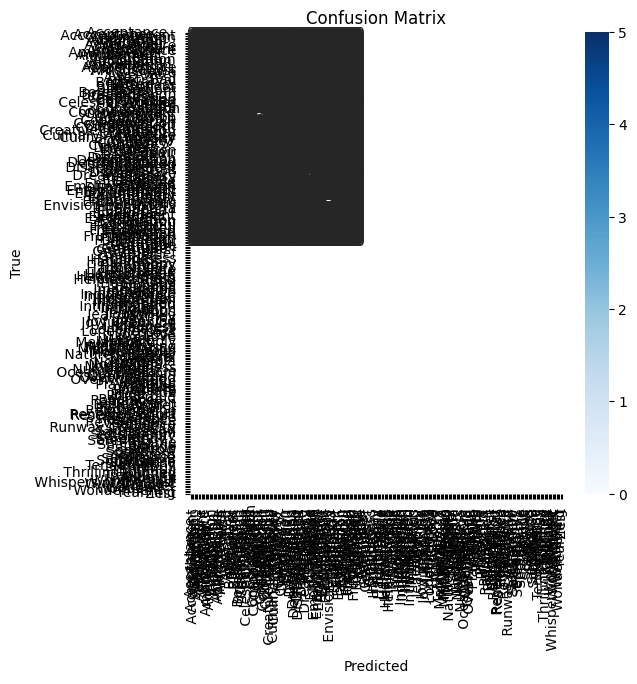

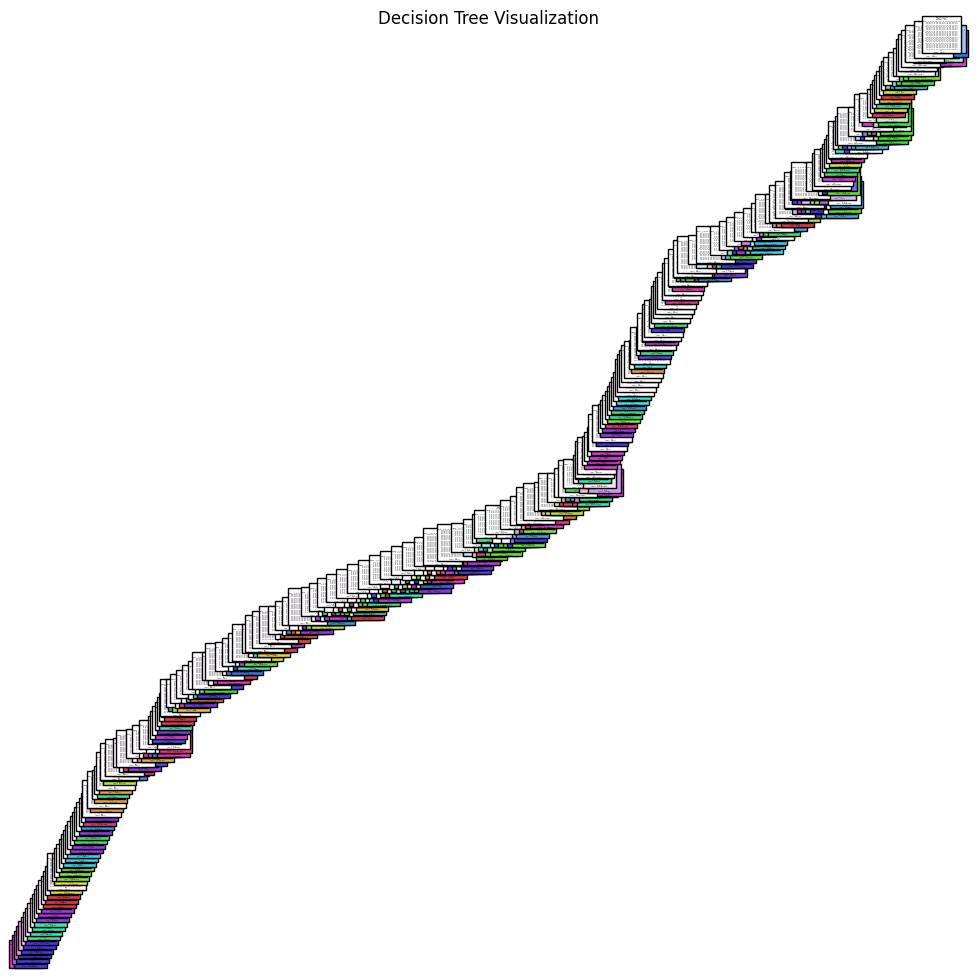

In [2]:
# Langkah 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Langkah 2: Upload dataset
from google.colab import files
uploaded = files.upload()

# Setelah file diupload, kita load data
file_path = list(uploaded.keys())[0]  # Ambil nama file pertama yang diupload
df = pd.read_csv(file_path)

# Langkah 3: Data Preprocessing

# Cek kolom-kolom yang ada
df.head()

# Menghapus kolom yang tidak diperlukan
df.drop(columns=['Unnamed: 0.1', 'Unnamed: 0', 'Timestamp', 'User', 'Hashtags', 'Country'], inplace=True)

# Cek tipe data dan cek missing values
df.info()

# Jika ada missing values, bisa di-drop atau diisi
df.dropna(inplace=True)  # Menghapus baris dengan nilai kosong (missing values)

# Encoding kolom 'Sentiment' ke dalam angka
le = LabelEncoder()
df['Sentiment'] = le.fit_transform(df['Sentiment'])

# Langkah 4: Representasi Teks ke Fitur Numerik menggunakan TF-IDF
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)  # Membatasi jumlah fitur maksimal menjadi 5000
X_tfidf = tfidf.fit_transform(df['Text'])

# Langkah 5: Pembagian Data Latih dan Uji
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, df['Sentiment'], test_size=0.2, random_state=42)

# Langkah 6: Pembuatan Model K-NN
knn = KNeighborsClassifier(n_neighbors=5)  # n_neighbors bisa disesuaikan
knn.fit(X_train, y_train)

# Langkah 7: Evaluasi Model
y_pred = knn.predict(X_test)

# Evaluasi menggunakan metrik evaluasi
print("Akurasi: ", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Matriks konfusi
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot Matriks Konfusi
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Langkah 8: Visualisasi Pohon Keputusan (Opsional)
# Membuat pohon keputusan untuk melihat pembagian fitur
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)

# Visualisasi pohon keputusan
plt.figure(figsize=(12, 12))
tree.plot_tree(dtree, feature_names=tfidf.get_feature_names_out(), class_names=le.classes_, filled=True)
plt.title("Decision Tree Visualization")
plt.show()

Saving sentimentdataset.csv to sentimentdataset (2).csv


<ipython-input-3-2089800442>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment', data=df, palette='viridis')


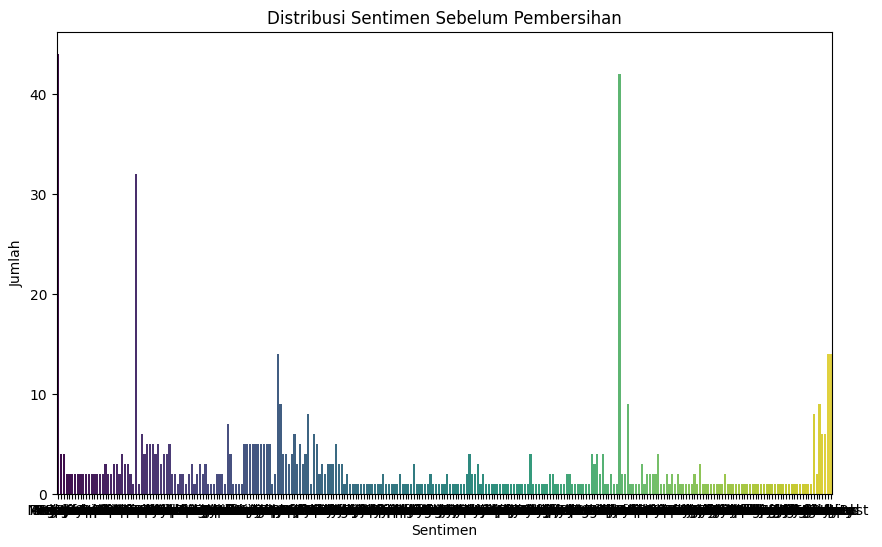

<ipython-input-3-2089800442>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment', data=df, palette='viridis')


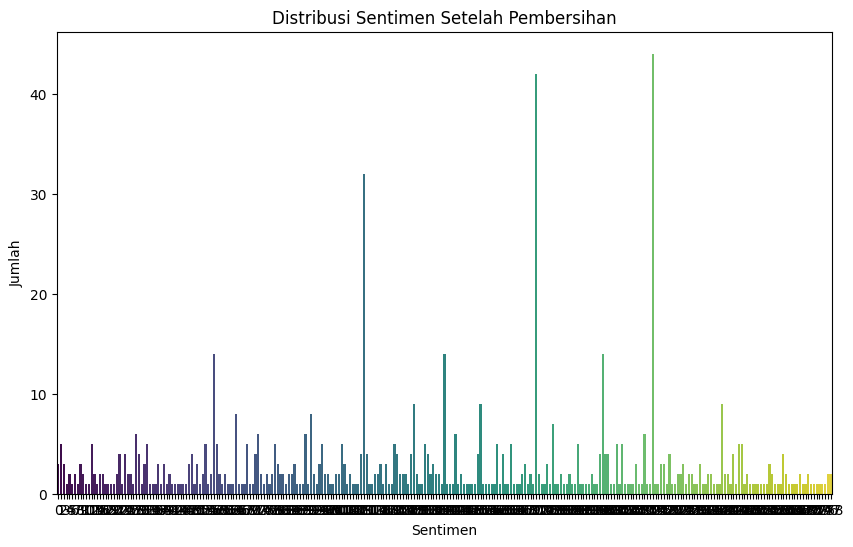

<ipython-input-3-2089800442>:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment', data=sentiment_before, palette='viridis', ax=ax[0])
<ipython-input-3-2089800442>:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment', data=df, palette='viridis', ax=ax[1])


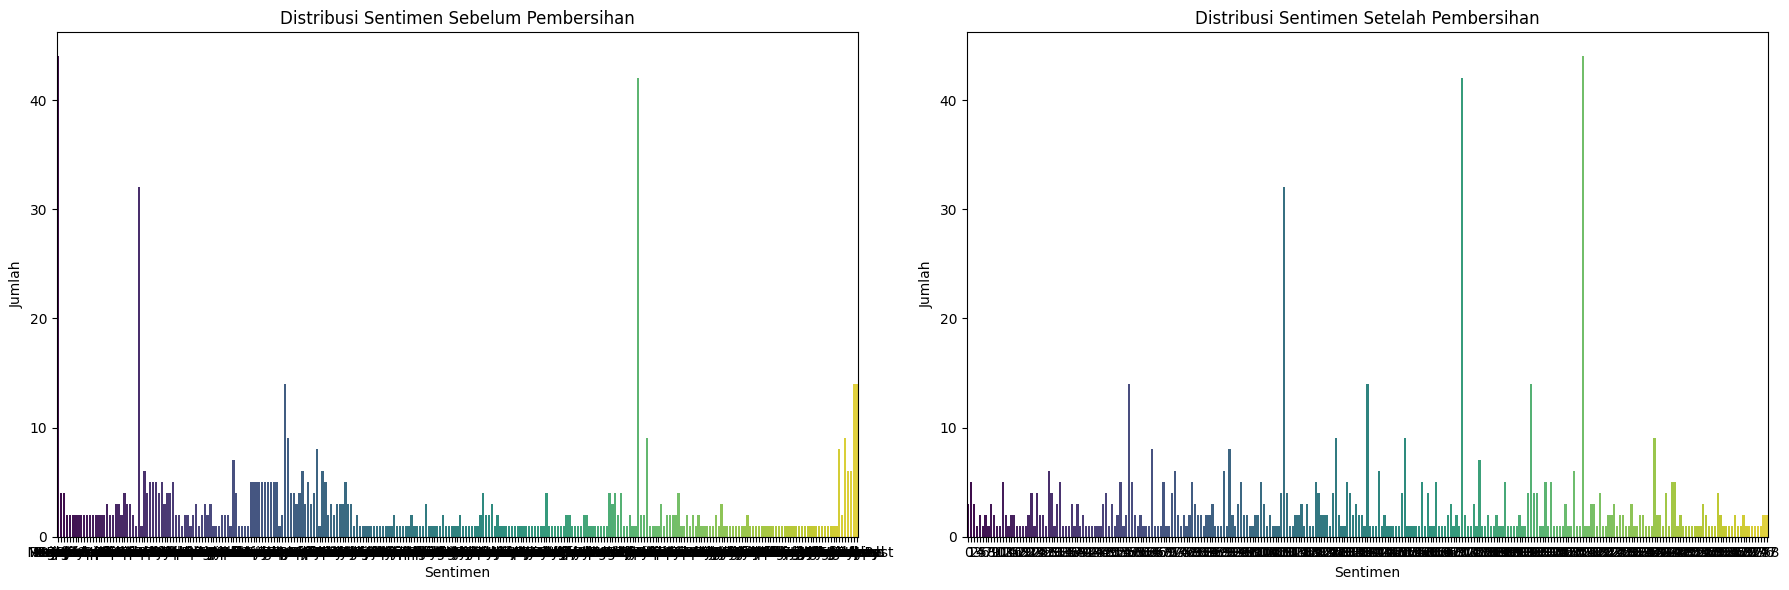

In [3]:
# Langkah 1: Import Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Langkah 2: Load dataset
from google.colab import files
uploaded = files.upload()

# Mengambil nama file yang diupload
file_path = list(uploaded.keys())[0]
df = pd.read_csv(file_path)

# Langkah 3: Grafik 1 - Distribusi Sentimen Sebelum Pembersihan
plt.figure(figsize=(10, 6))
sns.countplot(x='Sentiment', data=df, palette='viridis')
plt.title('Distribusi Sentimen Sebelum Pembersihan')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.show()

# Langkah 4: Pembersihan Data (Menghapus missing values dan encoding sentimen)
# Menghapus kolom yang tidak diperlukan
df.drop(columns=['Unnamed: 0.1', 'Unnamed: 0', 'Timestamp', 'User', 'Hashtags', 'Country'], inplace=True)

# Menghapus baris yang memiliki nilai kosong (missing values)
df.dropna(subset=['Sentiment'], inplace=True)

# Encoding kolom 'Sentiment' menjadi format numerik
le = LabelEncoder()
df['Sentiment'] = le.fit_transform(df['Sentiment'])

# Langkah 5: Grafik 2 - Distribusi Sentimen Setelah Pembersihan
plt.figure(figsize=(10, 6))
sns.countplot(x='Sentiment', data=df, palette='viridis')
plt.title('Distribusi Sentimen Setelah Pembersihan')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.show()

# Langkah 6: Perbandingan Sebelum dan Sesudah Pra-Pemrosesan
# Sebelum pra-pemrosesan, hitung jumlah label sentimen
sentiment_before = pd.read_csv(file_path)
sentiment_before.drop(columns=['Unnamed: 0.1', 'Unnamed: 0', 'Timestamp', 'User', 'Hashtags', 'Country'], inplace=True)
sentiment_before.dropna(subset=['Sentiment'], inplace=True)

# Visualisasi perbandingan distribusi sentimen sebelum dan sesudah pembersihan
fig, ax = plt.subplots(1, 2, figsize=(18, 6))

# Grafik 1: Sebelum Pembersihan
sns.countplot(x='Sentiment', data=sentiment_before, palette='viridis', ax=ax[0])
ax[0].set_title('Distribusi Sentimen Sebelum Pembersihan')
ax[0].set_xlabel('Sentimen')
ax[0].set_ylabel('Jumlah')

# Grafik 2: Setelah Pembersihan
sns.countplot(x='Sentiment', data=df, palette='viridis', ax=ax[1])
ax[1].set_title('Distribusi Sentimen Setelah Pembersihan')
ax[1].set_xlabel('Sentimen')
ax[1].set_ylabel('Jumlah')

plt.tight_layout()
plt.show()